In [29]:
# 美国2012总统大选数据分析
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [60]:
# 1.数据载入和总览
# 1.1 数据载入
data_1 = pd.read_csv("./data_US/data_01.csv", sep=",")
data_2 = pd.read_csv("./data_US/data_02.csv", sep=",")
data_3 = pd.read_csv("./data_US/data_03.csv", sep=",")
# 1.2 数据合并
data = pd.concat([data_1, data_2, data_3], axis=0, join="outer")
print(data.head())
# 查看数据信息，包括每个字段的名称，非空数量、字段的数据类型
data.info()

              cand_nm           contbr_nm contbr_st        contbr_employer  \
0  Bachmann, Michelle     HARVEY, WILLIAM        AL                RETIRED   
1  Bachmann, Michelle     HARVEY, WILLIAM        AL                RETIRED   
2  Bachmann, Michelle       SMITH, LANIER        AL  INFORMATION REQUESTED   
3  Bachmann, Michelle    BLEVINS, DARONDA        AR                   NONE   
4  Bachmann, Michelle  WARDENBURG, HAROLD        AR                   NONE   

       contbr_occupation  contb_receipt_amt contb_receipt_dt  
0                RETIRED              250.0        20-JUN-11  
1                RETIRED               50.0        23-JUN-11  
2  INFORMATION REQUESTED              250.0        05-JUL-11  
3                RETIRED              250.0        01-AUG-11  
4                RETIRED              300.0        20-JUN-11  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dt

In [30]:
# 用统计学指标快速描述数据概要
data.describe()

,contb_receipt_amt
count,9.914770e+05
mean,3.121934e+02
std,3.764479e+03
min,1.000000e-02
25%,3.500000e+01
50%,1.000000e+02
75%,2.500000e+02
max,2.014491e+06


In [31]:
# 2 数据清洗
# 2.1 缺失值处理
# 从data.info()得知，contbr_employer.contbr_occupation均有少量的缺失值，均填充为NOT PROVIDED
data["contbr_employer"].fillna("NOT PROVIDED",inplace=True)
data["contbr_occupation"].fillna("NOT PROVIDED",inplace=True)
data.info()
# 2.2 数据转换
# 2.2.1利用字典映射进行转换：党派分析
# 查看数据中总统候选人都有谁？
print("共有{}位候选人，分别是".format(len(data["cand_nm"].unique())))
data["cand_nm"].unique()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 991477 entries, 0 to 1730
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cand_nm            991477 non-null  object 
 1   contbr_nm          991477 non-null  object 
 2   contbr_st          991473 non-null  object 
 3   contbr_employer    991477 non-null  object 
 4   contbr_occupation  991477 non-null  object 
 5   contb_receipt_amt  991477 non-null  float64
 6   contb_receipt_dt   991477 non-null  object 
 7   party              991477 non-null  object 
dtypes: float64(1), object(7)
memory usage: 68.1+ MB
共有13位候选人，分别是


array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [32]:
# 通过搜索引擎等途径，获取每个总统候选人的所属党派，建立字典parties。候选人名字为key，所属党派为value
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}
# 通过map映射函数，增加一列party存储党派信息
data["party"] = data["cand_nm"].map(parties)
# print(data.columns)
# 查看两个党派的情况
data["party"].value_counts()

Democrat      589128
Republican    402349
Name: party, dtype: int64

In [33]:
# 排序：按照职业汇总对赞助总金额进行排序
print(data.groupby("contbr_occupation"))
data.groupby("contbr_occupation")["contb_receipt_amt"].sum().sort_values(ascending=False)[:20]

contbr_occupation
RETIRED           48866560.87
NOT PROVIDED      34696802.16
ATTORNEY          22170880.59
HOMEMAKER         17883151.58
PHYSICIAN          7329445.18
PRESIDENT          6599433.71
CEO                6286015.31
EXECUTIVE          5494011.14
CONSULTANT         5004638.16
OWNER              3409854.28
INVESTOR           3315901.92
SELF-EMPLOYED      2987019.04
ENGINEER           2769899.25
PROFESSOR          2461773.81
MANAGER            2207415.59
REAL ESTATE        2154804.34
SALES              1848351.82
CHAIRMAN           1792639.75
BUSINESS OWNER     1773321.73
NOT EMPLOYED       1754007.93
Name: contb_receipt_amt, dtype: float64

In [34]:
# 利用函数进行数据转换：职业与雇主信息分析
# 建立一个职业对应字典，把相同职业的不同表达映射为对应的职业，比如：C.E.O映射为CEO
occupation_map = {
  'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
  'INFORMATION REQUESTED':'NOT PROVIDED',
  'SELF' : 'SELF-EMPLOYED',
  'SELF EMPLOYED' : 'SELF-EMPLOYED',
  'C.E.O.':'CEO',
  'LAWYER':'ATTORNEY',
}
# 如果不在字典中，返回x
f = lambda x: occupation_map.get(x, x)
data.contbr_occupation = data.contbr_occupation.map(f)

In [35]:
# 利用同样的方法，对雇主信息进行类似转换
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
# if no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
data.contbr_employer = data.contbr_employer.map(f)

In [36]:
# 2.3 数据筛选
# 赞助金额筛选:赞助包括（负的出资额），为了简化分析过程，我们限定数据集只有正出资额
data = data[data["contb_receipt_amt"]>0]

# 候选人筛选（Obama，Romney）
# 查看各候选人获得的赞助总金额
data.groupby("cand_nm")["contb_receipt_amt"].sum().sort_values(ascending=False)

cand_nm
Obama, Barack                     1.358776e+08
Romney, Mitt                      8.833591e+07
Paul, Ron                         2.100962e+07
Perry, Rick                       2.030675e+07
Gingrich, Newt                    1.283277e+07
Santorum, Rick                    1.104316e+07
Cain, Herman                      7.101082e+06
Pawlenty, Timothy                 6.004819e+06
Huntsman, Jon                     3.330373e+06
Bachmann, Michelle                2.711439e+06
Johnson, Gary Earl                5.669616e+05
Roemer, Charles E. 'Buddy' III    3.730099e+05
McCotter, Thaddeus G              3.903000e+04
Name: contb_receipt_amt, dtype: float64

In [37]:
# 选取候选人为Obama，Romney的子集数据
data_vs = data[data["cand_nm"].isin(["Obama, Barack","Romney, Mitt"])].copy()
print(data_vs.head(5))

          cand_nm           contbr_nm contbr_st  \
411  Romney, Mitt  ELDERBAUM, WILLIAM        AA   
412  Romney, Mitt  ELDERBAUM, WILLIAM        AA   
413  Romney, Mitt    CARLSEN, RICHARD        AE   
414  Romney, Mitt      DELUCA, PIERRE        AE   
415  Romney, Mitt    SARGENT, MICHAEL        AE   

                      contbr_employer          contbr_occupation  \
411                     US GOVERNMENT    FOREIGN SERVICE OFFICER   
412                     US GOVERNMENT    FOREIGN SERVICE OFFICER   
413       DEFENSE INTELLIGENCE AGENCY       INTELLIGENCE ANALYST   
414                             CISCO                   ENGINEER   
415  RAYTHEON TECHNICAL SERVICES CORP  COMPUTER SYSTEMS ENGINEER   

     contb_receipt_amt contb_receipt_dt       party  
411               25.0        01-FEB-12  Republican  
412              110.0        01-FEB-12  Republican  
413              250.0        13-APR-12  Republican  
414               30.0        21-AUG-11  Republican  
415           

In [46]:
# 2.4 面元化数据
# 利用cut函数根据出资金额大小将数据离散化到多个面元中：
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(data_vs['contb_receipt_amt'],bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
201381      (10, 100]
201382    (100, 1000]
201383        (1, 10]
201384      (10, 100]
201385    (100, 1000]
Name: contb_receipt_amt, Length: 694283, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [47]:
# 3.数据聚合与分组运算
# 分组运算是一个“split-apply-combine”的过程
# split：pandas对象中的数据会根据你所提供的一个或多个键被拆分为多组
# apply：将一个函数应用到各分组并产生一个新值
# combine：所有这些函数的执行结果会合并到最终的结果对象中

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')


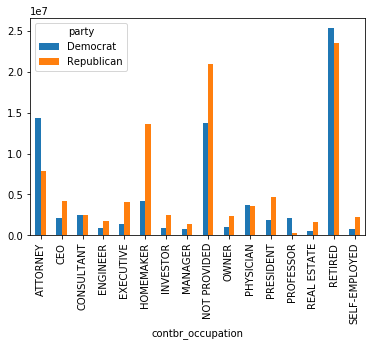

In [48]:
# 3.1 透视表pivot_table分析党派和职业
# 按照党派，职业对赞助金额进行汇总，类似Excel中的透视表操作，聚合函数为sum
print(data.columns)
by_occupation = data.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum')
# # 过滤掉赞助金额小于200W的数据
over_2mm = by_occupation[by_occupation.sum(1)>2000000]
over_2mm
over_2mm.plot(kind="bar")

In [49]:
# 3.2分组级运算和转换
# 根据职业与雇主信息分组运算：先了解一下Obama和Romney总出资最高的职业与雇主
# 注意：这里巧妙利用了dict.get，它允许没有映射关系的职业也能”通过“
# 由于职业和雇主的处理非常相似，我们定义函数来对两个字段进行分析处理

def get_top_amounts(group,key,n=5):
    '''传入groupby分组后的对象，返回按照key字段汇总的排序前n的数据'''
    totals = group.groupby(key)["contb_receipt_amt"].sum()
    return totals.sort_values(ascending=False)[:n]

grouped = data_vs.groupby("cand_nm")
grouped.apply(get_top_amounts,'contbr_occupation',n=7)


cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305316.38
               ATTORNEY             14302461.84
               NOT PROVIDED         13725187.32
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               CONSULTANT            2459912.71
               PROFESSOR             2165071.08
Romney, Mitt   NOT PROVIDED         11638509.84
               RETIRED              11508473.59
               HOMEMAKER             8147446.22
               ATTORNEY              5372424.02
               PRESIDENT             2491244.89
               CEO                   2324297.03
               EXECUTIVE             2300947.03
Name: contb_receipt_amt, dtype: float64

In [50]:
#同样的，使用get_top_amounts()对雇主进行分析处理
grouped.apply(get_top_amounts,'contbr_employer',n=10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22694558.85
               SELF-EMPLOYED         18626807.16
               NOT PROVIDED          13883494.03
               NOT EMPLOYED           8586308.70
               HOMEMAKER              2605408.54
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDED          12321731.24
               RETIRED               11506225.71
               HOMEMAKER              8147196.22
               SELF-EMPLOYED          7414115.22
               STUDENT                 496490.94
               CREDIT SUISSE           281150.00
               MORGAN STANLEY          267266.00
               GOLDMAN SACH & CO.      238250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

In [51]:
# 对赞助金额进行分组分析（matplotlib绘图）
# 前面我们已经利用pd.cut()函数，根据出资额大小将数据离散化到多个面元中，接下来我们就要对每个离散化的面元进行分组分析

# 首先统计各出资区间的赞助笔数，这里用到unstack()，stack()函数是堆叠，unstack()函数就是不要堆叠，即把多层索引变为表格数据
#labels是之前赞助金额离散化后的Series
grouped_bins = data_vs.groupby(['cand_nm',labels])
grouped_bins.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153992,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [52]:
# 接下来：再我们再统计各区间的赞助金额

bucket_sums=grouped_bins['contb_receipt_amt'].sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798731.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


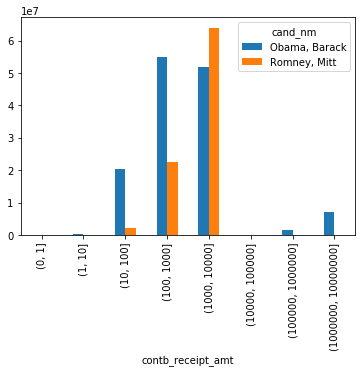

In [53]:
#Obama、Romney各区间赞助总金额
bucket_sums.plot(kind='bar')

In [54]:
'''上图虽然能够大概看出Obama、Romney的赞助金额区间分布，但对比并不够突出，如果用百分比堆积图效果会更好，下面我们就实现以下'''
#算出每个区间两位候选人收到赞助总金额的占比
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710177,0.289823
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


'可以看出，小额赞助方面，Obama获得的数量和金额比Romney多得多'

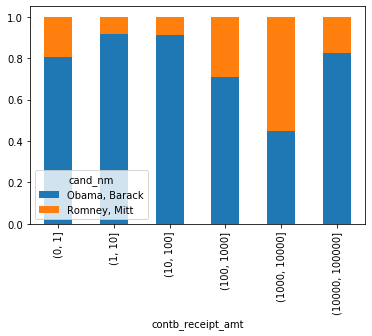

In [55]:
#使用柱状图，指定stacked=True进行堆叠，即可完成百分比堆积图
normed_sums[:-2].plot(kind='bar',stacked=True)
'''可以看出，小额赞助方面，Obama获得的数量和金额比Romney多得多'''

In [56]:
# 按照赞助人姓名分组计数，计算重复赞助次数最多的前20人
data.groupby('contbr_nm')['contbr_nm'].count().sort_values(ascending=False)[:20]

contbr_nm
WILLIAMS, DEBBY          205
BERKE, DAVID MICHAEL     171
SEBAG, DAVID             161
SMITH, ERIK              145
FALLSGRAFF, TOBY         138
SKINNER, DONNA           136
CASPERSON, CAROLINA      132
HARRIS, CLAUDIA W.       132
ROSBERG, MARILYN         115
POTTS, LILLIE            114
DUDLEY, DEBBIE           111
HAUGHEY, NOEL ANTHONY    107
DFHDFH, DFHDFH            96
SHERWIN, GLEN R.          94
MITCHELL, CAITLIN         90
SMITH, CHARLES            88
KARIMIAN, AFSANEH         87
NURU, ISAAC               87
MASTERS, MARGERY          85
BIRMINGHAM, TOM           85
Name: contbr_nm, dtype: int64

In [57]:
# 4.时间处理
# 4.1 str转datatime
'''我们可以使用to_datetime方法解析多种不同的日期表示形式。对标准日期格式（如ISO8601）的解析非常快。
我们也可以指定特定的日期解析格式，如pd.to_datetime(series,format='%Y%m%d')'''

data_vs['time'] = pd.to_datetime(data_vs['contb_receipt_dt'])

In [58]:
# 4.2 以时间做索引
data_vs.set_index('time',inplace=True)
data_vs.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
time,,,,,,,,
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
2012-04-13,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
2011-08-21,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
2012-03-07,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican


In [59]:
# 4.3 重采样和频度转换
'''重采样（Resampling）指的是把时间序列的频度变为另一个频度的过程。把高频度的数据变为低频度叫做降采样（downsampling），
resample会对数据进行分组，然后再调用聚合函数。这里我们把频率从每日转换为每月，属于高频转低频的降采样'''
vs_time = data_vs.groupby('cand_nm').resample('M')['cand_nm'].count()
vs_time.unstack(0)
# vs_time


cand_nm,"Obama, Barack","Romney, Mitt"
time,,
2011-04-30,13830,1096
2011-05-31,12182,4163
2011-06-30,25626,5757
2011-07-31,12372,2454
2011-08-31,19860,3226
2011-09-30,46927,7968
2011-10-31,25941,5349
2011-11-30,32629,7737
2011-12-31,63562,10289


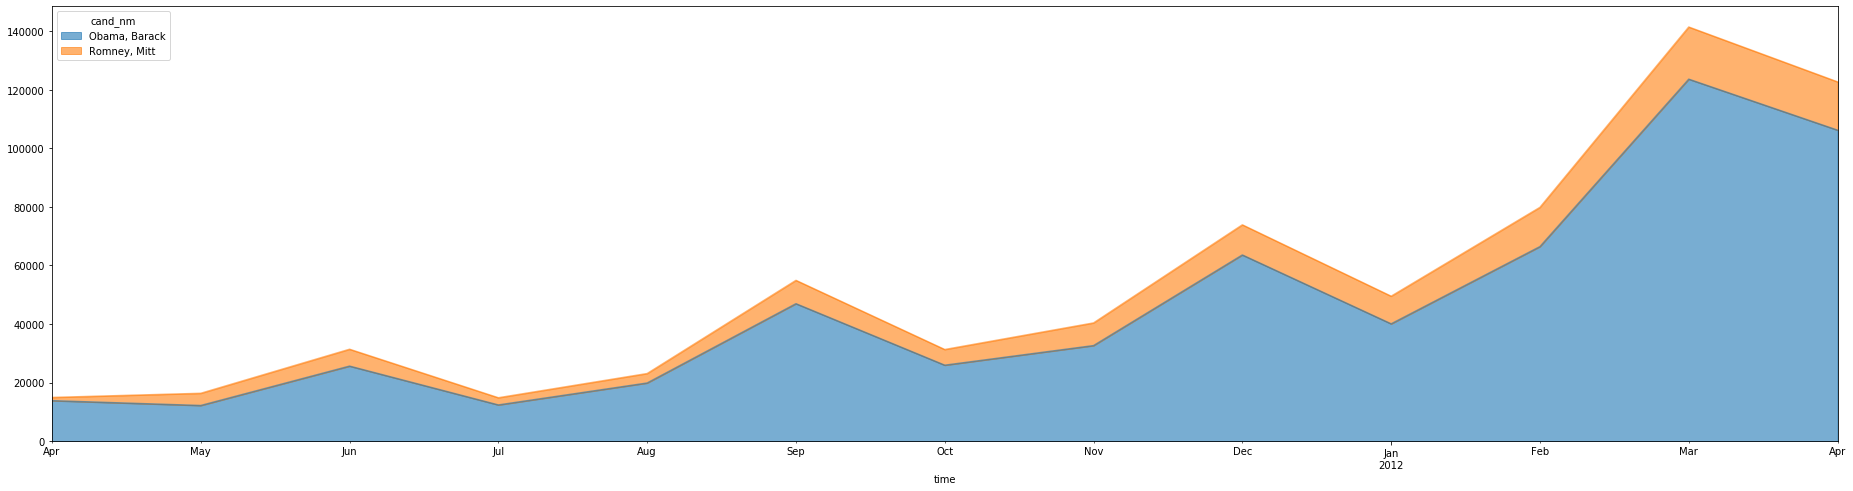

In [69]:
'''我们用面积图把11年4月-12年4月两位总统候选人接受的赞助笔数做个对比可以看出，
越临近竞选，大家赞助的热情越高涨，奥巴马在各个时段都占据绝对的优势'''

fig1, ax1=plt.subplots(figsize=(32,8))
vs_time.unstack(0).plot(kind='area',ax=ax1,alpha=0.6)
plt.show()